<a href="https://colab.research.google.com/github/guilhermegranchopro/Eco-AI.ly/blob/main/LSTM/Live_Predictions_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd

# Endpoint da API
url = "https://api.electricitymap.org/v3/carbon-intensity/history?zone=PT"

# Cabeçalhos da requisição
headers = {
    "auth-token": "czG7nq1wv9OHi1phrXUn"  # Substitua por uma chave válida
}

# Fazendo a requisição
response = requests.get(url, headers=headers)

# Verificando o status da resposta
if response.status_code == 200:
    # Convertendo para JSON
    data = response.json()

    # Criando um DataFrame com os dados
    if "history" in data:
        df = pd.DataFrame(data["history"])
        print("Dados de Intensidade de Carbono (LCA):\n")
        print(df)  # Exibir os primeiros registros
    else:
        print("A chave 'history' não foi encontrada nos dados retornados.")
else:
    print(f"Erro: {response.status_code}")
    print(response.text)  # Mensagem detalhada do erro

Dados de Intensidade de Carbono (LCA):

   zone  carbonIntensity                  datetime                 updatedAt  \
0    PT               87  2025-01-29T17:00:00.000Z  2025-01-30T10:44:42.441Z   
1    PT               94  2025-01-29T18:00:00.000Z  2025-01-30T10:44:42.441Z   
2    PT               95  2025-01-29T19:00:00.000Z  2025-01-30T10:44:42.441Z   
3    PT               91  2025-01-29T20:00:00.000Z  2025-01-30T10:44:45.369Z   
4    PT               88  2025-01-29T21:00:00.000Z  2025-01-30T10:44:45.369Z   
5    PT               72  2025-01-29T22:00:00.000Z  2025-01-30T13:46:15.952Z   
6    PT               74  2025-01-29T23:00:00.000Z  2025-01-30T13:45:52.573Z   
7    PT               69  2025-01-30T00:00:00.000Z  2025-01-30T09:44:23.253Z   
8    PT               66  2025-01-30T01:00:00.000Z  2025-01-30T09:44:23.253Z   
9    PT               62  2025-01-30T02:00:00.000Z  2025-01-30T11:44:01.136Z   
10   PT               64  2025-01-30T03:00:00.000Z  2025-01-30T11:44:01.136Z   


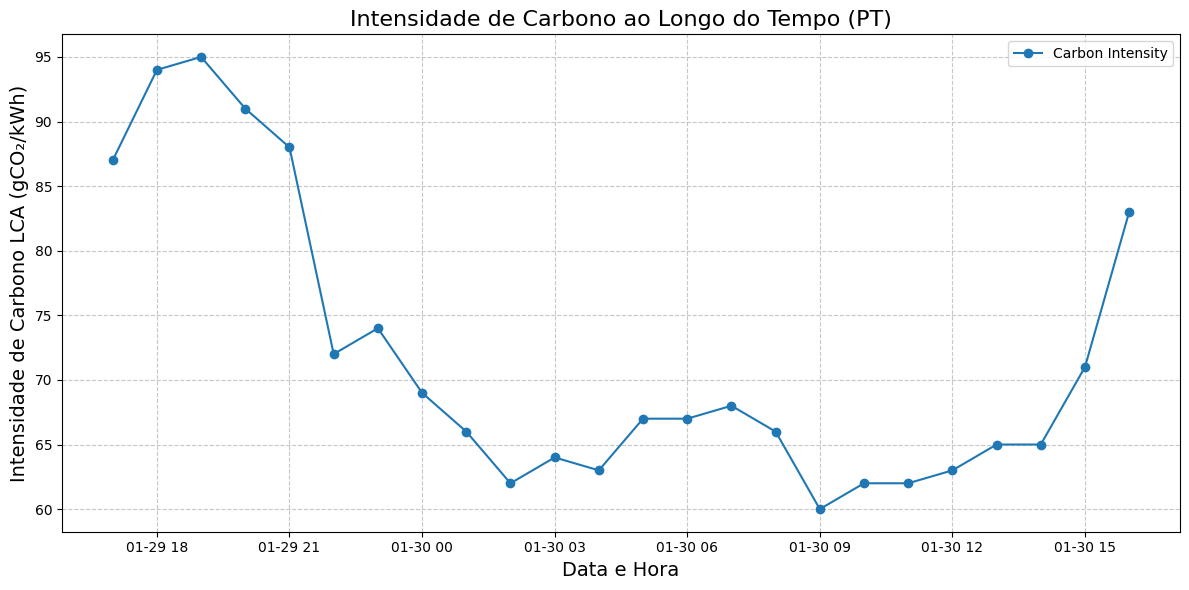

In [5]:
import matplotlib.pyplot as plt

# Verificando o status da resposta
if response.status_code == 200:
    # Convertendo para JSON
    data = response.json()

    # Criando um DataFrame com os dados
    if "history" in data:
        df = pd.DataFrame(data["history"])

        # Convertendo a coluna de datetime para um formato utilizável
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Configurando o índice do DataFrame para datetime
        df.set_index('datetime', inplace=True)

        # Plotando os dados
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['carbonIntensity'], marker='o', linestyle='-', label='Carbon Intensity')
        plt.title("Intensidade de Carbono ao Longo do Tempo (PT)", fontsize=16)
        plt.xlabel("Data e Hora", fontsize=14)
        plt.ylabel("Intensidade de Carbono LCA (gCO₂/kWh)", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("A chave 'history' não foi encontrada nos dados retornados.")
else:
    print(f"Erro: {response.status_code}")
    print(response.text)  # Mensagem detalhada do erro